# Dynamic Time Warping

Longzhu Shen 

GeoComput & ML 

18 May 2021


### Installation 
    $ coda install -c conda-forge dtw-python
    $ coda install pywavelets

In [4]:
import numpy as np
from dtw import *
import matplotlib.pyplot as plt

## First Example

In [68]:
## A noisy sine wave as query
idx = np.linspace(0,6.28,num=100)
query = np.sin(idx) + np.random.uniform(size=100)/10.0

## A cosine is for template; sin and cos are offset by 25 samples
template = np.cos(idx)

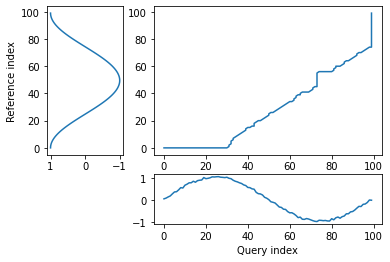

In [69]:
## Find the best match with the canonical recursion formula
alignment = dtw(query, template, keep_internals=True)

## Display the warping curve, i.e. the alignment curve
alignment.plot(type="threeway")
plt.show()

In [63]:
alignment.normalizedDistance

0.12598951335028086

Step pattern recursion:
 g[i,j] = min(
     g[i-1,j-1] + 2 * d[i  ,j  ] ,
     g[i  ,j-1] +     d[i  ,j  ] ,
     g[i-1,j  ] +     d[i  ,j  ] ,
 ) 

Normalization hint: N+M



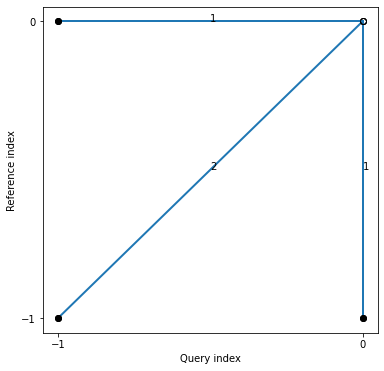

In [72]:
## See the recursion relation, as formula and diagram
print(alignment.stepPattern)
alignment.stepPattern.plot()
plt.show()

## Parameters

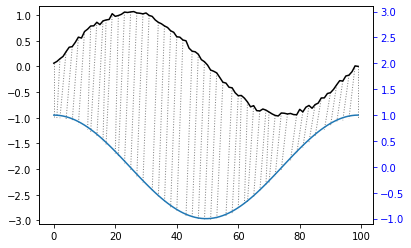

In [73]:
## Align and plot with the Sakoe-Chiba
dtw(query, template, keep_internals=True, window_type="sakoechiba", window_args={'window_size':2},
    step_pattern=symmetricP1).plot(type="twoway",offset=-2)
plt.show()

Step pattern recursion:
 g[i,j] = min(
     g[i-1,j-2] + 2 * d[i  ,j-1] +     d[i  ,j  ] ,
     g[i-1,j-1] + 2 * d[i  ,j  ] ,
     g[i-2,j-1] + 2 * d[i-1,j  ] +     d[i  ,j  ] ,
 ) 

Normalization hint: N+M



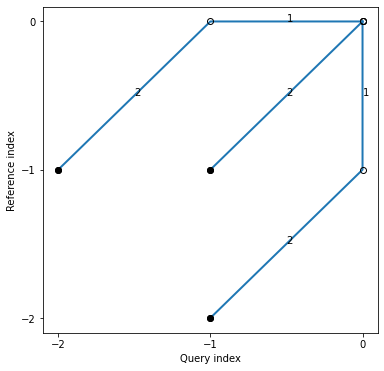

In [75]:
print(symmetricP1)
symmetricP1.plot()
plt.show()

Step pattern recursion:
 g[i,j] = min(
     g[i-2,j-3] + 2 * d[i-1,j-2] + 2 * d[i  ,j-1] +     d[i  ,j  ] ,
     g[i-1,j-1] + 2 * d[i  ,j  ] ,
     g[i-3,j-2] + 2 * d[i-2,j-1] + 2 * d[i-1,j  ] +     d[i  ,j  ] ,
 ) 

Normalization hint: N+M



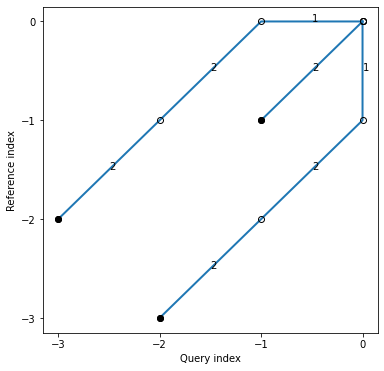

In [74]:
print(symmetricP2)
symmetricP2.plot()
plt.show()

## Shifted TS

In [55]:
idx = np.linspace(0,6.28,num=100)
query = np.sin(idx) 
reference = np.sin(idx + 0.314)

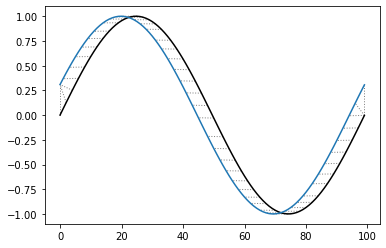

In [57]:
alignment = dtw(query, reference, keep_internals=True)
alignment.plot(type="twoway")
plt.show()

In [59]:
alignment.normalizedDistance

0.011063586676074938

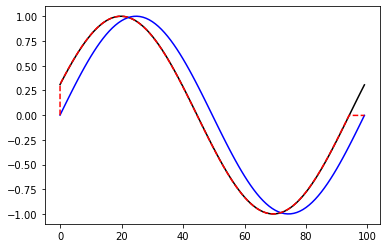

In [58]:
plt.plot(reference,color='k')
plt.plot(query,color='b')
plt.plot(alignment.index2,query[alignment.index1],'--',color='r')  
plt.show()

## Warping Path

In [6]:
idx1 = np.linspace(0,6.28,num=18)
query = np.sin(idx1 + 3.14/10) 
idx2 = np.linspace(0,6.28,num=20)
reference = np.sin(idx2)

In [7]:
alignment = dtw(query, reference, keep_internals=True, step_pattern=symmetricP1,window_type="sakoechiba", window_args={'window_size':4})

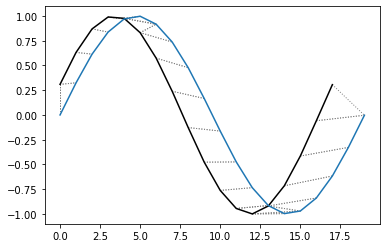

In [8]:
alignment = dtw(query, reference, keep_internals=True)
alignment.plot(type="twoway")
plt.show()

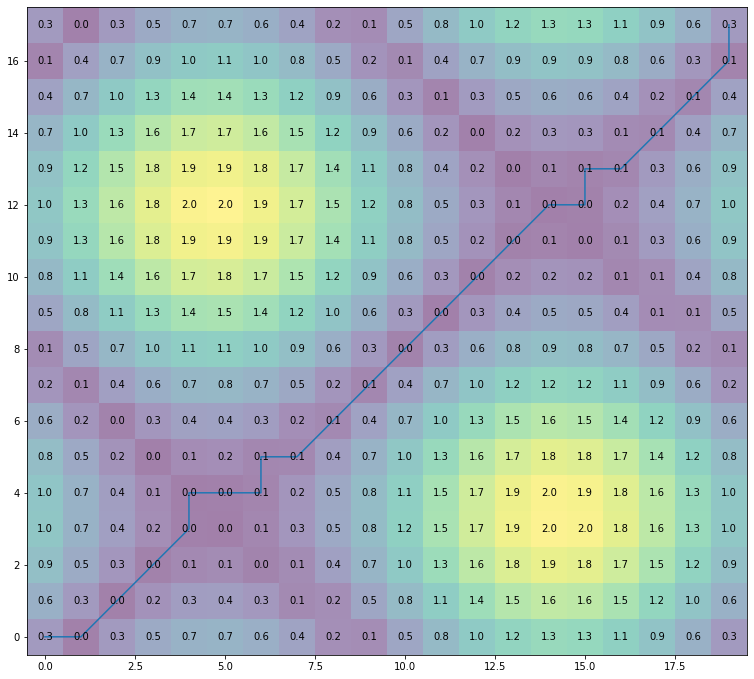

In [9]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_axes([0, 0, 0.5, 0.5])
for (j,i),label in np.ndenumerate(np.round(alignment.localCostMatrix,1)):
    ax.text(i,j,label,ha='center',va='center')
plt.imshow(alignment.localCostMatrix,alpha=0.5,origin='lower')
plt.plot(alignment.index2,alignment.index1)
plt.show()

## Wavelets

### TS Processing

In [1]:
import pywt
import pywt.data

In [8]:
pywt.families()

['haar',
 'db',
 'sym',
 'coif',
 'bior',
 'rbio',
 'dmey',
 'gaus',
 'mexh',
 'morl',
 'cgau',
 'shan',
 'fbsp',
 'cmor']

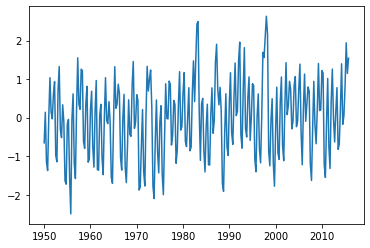

In [5]:
plt.plot(pywt.data.nino()[0],pywt.data.nino()[1])
plt.show()

In [6]:
sLst = np.arange(1, 31)
cwtmatr, freqs = pywt.cwt(pywt.data.nino()[1], sLst, 'mexh')

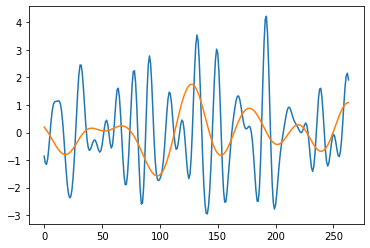

In [7]:
plt.plot(cwtmatr[3])
plt.plot(cwtmatr[15])
plt.show()

### 2D Application

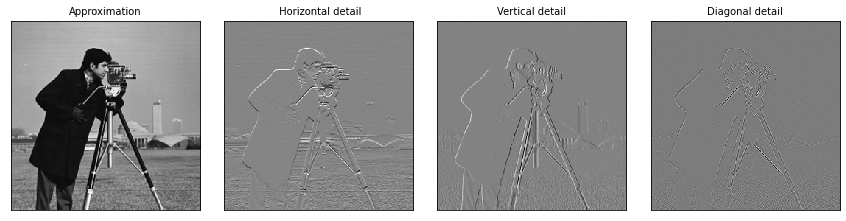

In [14]:
# Load image
original = pywt.data.camera()

# Wavelet transform of image, and plot approximation and details
titles = ['Approximation', ' Horizontal detail',
          'Vertical detail', 'Diagonal detail']
coeffs2 = pywt.dwt2(original, 'bior1.3')
LL, (LH, HL, HH) = coeffs2
fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([LL, LH, HL, HH]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()
plt.show()

## References

- https://dynamictimewarping.github.io/
- Toni Giorgino (2009). Journal of Statistical Software, 31(7), 1-24, doi:10.18637/jss.v031.i07.
- https://pywavelets.readthedocs.io/en/latest/index.html#
- Gregory R. Lee, Ralf Gommers, Filip Wasilewski, Kai Wohlfahrt, Aaron O’Leary (2019).https://doi.org/10.21105/joss.01237.